In [385]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [386]:
city = os.path.join("raw_data","city_data.csv")
ride = os.path.join("raw_data","ride_data.csv")
city_pd = pd.read_csv(city)
ride_pd = pd.read_csv(ride)

In [387]:
city_pd.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [388]:
ride_pd.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [389]:
city_ride_pd = pd.merge(city_pd, ride_pd, how='outer', on="city")
city_ride_pd.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [390]:
avg_city_fare = city_ride_pd.groupby('city')["fare"].mean()
avg_city_fare.head()

city
Alvarezhaven    23.928710
Alyssaberg      20.609615
Anitamouth      37.315556
Antoniomouth    23.625000
Aprilchester    21.981579
Name: fare, dtype: float64

In [391]:
avg_city_fare = avg_city_fare.to_frame().reset_index()
avg_city_fare.head()

,city,fare
0,Alvarezhaven,23.928710
1,Alyssaberg,20.609615
2,Anitamouth,37.315556
3,Antoniomouth,23.625000
4,Aprilchester,21.981579


In [392]:
avg_city_fare = avg_city_fare.rename(columns={"fare":"avg_fare"})
avg_city_fare.head()

,city,avg_fare
0,Alvarezhaven,23.928710
1,Alyssaberg,20.609615
2,Anitamouth,37.315556
3,Antoniomouth,23.625000
4,Aprilchester,21.981579


In [393]:
total_rides_city = city_ride_pd.groupby('city')["ride_id"].count()
total_rides_city.head()

city
Alvarezhaven    31
Alyssaberg      26
Anitamouth       9
Antoniomouth    22
Aprilchester    19
Name: ride_id, dtype: int64

In [394]:
total_rides_city = total_rides_city.to_frame().reset_index()
total_rides_city.head()

,city,ride_id
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9
3,Antoniomouth,22
4,Aprilchester,19


In [395]:
total_rides_city = total_rides_city.rename(columns = {"ride_id":"riders"})
total_rides_city.head()

,city,riders
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9
3,Antoniomouth,22
4,Aprilchester,19


In [396]:
total_drivers_city = city_ride_pd.groupby('city')["driver_count"].sum()
total_drivers_city.head()

city
Alvarezhaven     651
Alyssaberg      1742
Anitamouth       144
Antoniomouth     462
Aprilchester     931
Name: driver_count, dtype: int64

In [397]:
total_drivers_city = total_drivers_city.to_frame().reset_index()
total_drivers_city.head()

,city,driver_count
0,Alvarezhaven,651
1,Alyssaberg,1742
2,Anitamouth,144
3,Antoniomouth,462
4,Aprilchester,931


In [398]:
bp = pd.merge(avg_city_fare, total_rides_city, how='outer', on="city")
bp.head()

,city,avg_fare,riders
0,Alvarezhaven,23.928710,31
1,Alyssaberg,20.609615,26
2,Anitamouth,37.315556,9
3,Antoniomouth,23.625000,22
4,Aprilchester,21.981579,19


In [399]:
bp_city = pd.merge(bp, city_pd, how='outer', on="city")
bp_city.head()

,city,avg_fare,riders,driver_count,type
0,Alvarezhaven,23.928710,31,21,Urban
1,Alyssaberg,20.609615,26,67,Urban
2,Anitamouth,37.315556,9,16,Suburban
3,Antoniomouth,23.625000,22,21,Urban
4,Aprilchester,21.981579,19,49,Urban


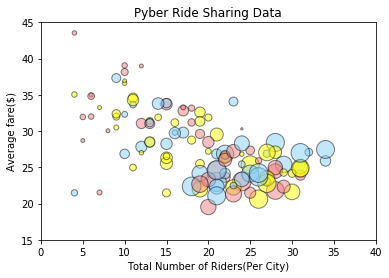

In [401]:
plt.ylim(15,45)
plt.xlim(0,40)
colors = ["lightcoral", "yellow", "lightskyblue"]
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Riders(Per City)")
plt.ylabel("Average fare($)")
plt.scatter(bp_city["riders"], 
            bp_city["avg_fare"], 
            marker="o", s=(bp_city["driver_count"]*5), 
            edgecolor="black", alpha=.50, 
            #c=(bp_city["type"])
            facecolors=["lightcoral","yellow","lightskyblue"])
plt.show()

In [402]:
city_type = city_ride_pd.loc[:,["city", "type"]]
city_type.head()

,city,type
0,Kelseyland,Urban
1,Kelseyland,Urban
2,Kelseyland,Urban
3,Kelseyland,Urban
4,Kelseyland,Urban


In [403]:
fares_city = city_ride_pd.groupby('type')["fare"].mean()
fares_city

type
Rural       34.040720
Suburban    30.952344
Urban       24.663594
Name: fare, dtype: float64

In [404]:
fares_city = fares_city.to_frame().reset_index()
fares_city

,type,fare
0,Rural,34.040720
1,Suburban,30.952344
2,Urban,24.663594


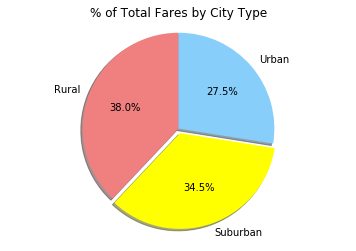

In [405]:
fare = fares_city["fare"]
type = fares_city["type"]
colors = ["lightcoral", "yellow", "lightskyblue"]
explode = (0, 0.05, 0,)
plt.title("% of Total Fares by City Type")
plt.pie(fare, explode=explode, labels=type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()


In [406]:
rides_city = city_ride_pd.groupby('type')["ride_id"].count()
rides_city

type
Rural        125
Suburban     657
Urban       1625
Name: ride_id, dtype: int64

In [407]:
rides_city = rides_city.to_frame().reset_index()
rides_city


,type,ride_id
0,Rural,125
1,Suburban,657
2,Urban,1625


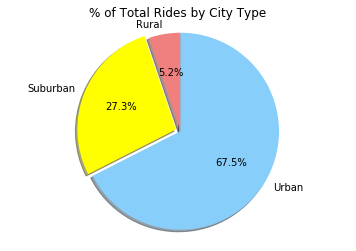

In [408]:
ride_id = rides_city["ride_id"]
type = rides_city["type"]
colors = ["lightcoral", "yellow", "lightskyblue"]
explode = (0, 0.05, 0,)
plt.title("% of Total Rides by City Type")
plt.pie(ride_id, explode=explode, labels=type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

In [409]:
drivers_type = city_ride_pd.groupby('type')["driver_count"].sum()
drivers_type

type
Rural         727
Suburban     9730
Urban       64501
Name: driver_count, dtype: int64

In [410]:
drivers_type = drivers_type.reset_index()
drivers_type

,type,driver_count
0,Rural,727
1,Suburban,9730
2,Urban,64501


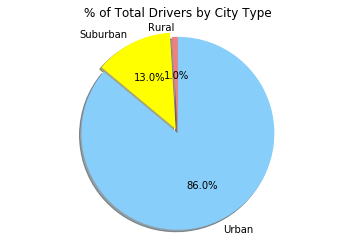

In [411]:
driver_count = drivers_type["driver_count"]
type = drivers_type["type"]
colors = ["lightcoral", "yellow", "lightskyblue"]
explode = (0, 0.05, 0,)
plt.title("% of Total Drivers by City Type")
plt.pie(driver_count, explode=explode, labels=type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

In [412]:
type1 = pd.merge(drivers_type, rides_city, how='outer', on="type")
type1.head()


,type,driver_count,ride_id
0,Rural,727,125
1,Suburban,9730,657
2,Urban,64501,1625


In [413]:
type2 = pd.merge(type1, fares_city, how='outer', on="type")
type2.head()

,type,driver_count,ride_id,fare
0,Rural,727,125,34.040720
1,Suburban,9730,657,30.952344
2,Urban,64501,1625,24.663594
